In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
my_list = os.listdir('train')

In [3]:
# number of images in each floder
for dir,subdir,files in os.walk('train'):
    print (dir,' ,', str(len(files)))

train  , 0
train\angry  , 3995
train\disgust  , 3148
train\fear  , 4097
train\happy  , 7215
train\neutral  , 4965
train\sad  , 4830
train\surprise  , 3171


In [4]:
img_size = 48
batch_size = 32

In [6]:
train_dir = 'train/'
test_dir = 'test/'

In [7]:
datagen_train =  tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
train_generator = datagen_train.flow_from_directory(train_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

datagen_validation =  tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
validation_generator = datagen_train.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')

Found 31421 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
# Initialising the CNN
model = tf.keras.Sequential()

# 1 - Convolution
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(128,(5,5), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 3rd Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# 4th Convolution layer
model.add(tf.keras.layers.Conv2D(512,(3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Flattening
model.add(tf.keras.layers.Flatten())

# Fully connected layer 1st layer

model.add(tf.keras.layers.Dropout(0.25))

# output layer 
model.add(tf.keras.layers.Dense(7, activation='softmax'))

# compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [9]:
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch

981

In [10]:
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps

224

In [11]:
#  adding various CAllBacks to prevent overfiiting
# this decreases the learning rate if the model loss does not decrease 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
# to save model weights 
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr, early_stopping]

In [12]:
# fitting the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
981/981 [==============================] - ETA: 0s - loss: 2.1018 - accuracy: 0.2971
Epoch 1: saving model to model_weights.h5
981/981 [==============================] - 549s 542ms/step - loss: 2.1018 - accuracy: 0.2971 - val_loss: 1.5881 - val_accuracy: 0.3834 - lr: 5.0000e-04
Epoch 2/50
981/981 [==============================] - ETA: 0s - loss: 1.5723 - accuracy: 0.4384
Epoch 2: saving model to model_weights.h5
981/981 [==============================] - 145s 147ms/step - loss: 1.5723 - accuracy: 0.4384 - val_loss: 1.6509 - val_accuracy: 0.4022 - lr: 5.0000e-04
Epoch 3/50
981/981 [==============================] - ETA: 0s - loss: 1.3650 - accuracy: 0.4975
Epoch 3: saving model to model_weights.h5
981/981 [==============================] - 49s 50ms/step - loss: 1.3650 - accuracy: 0.4975 - val_loss: 1.5173 - val_accuracy: 0.4468 - lr: 5.0000e-04
Epoch 4/50
980/981 [============================>.] - ETA: 0s - loss: 1.2610 - accuracy: 0.5304
Epoch 4: saving model to model_weigh

981/981 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.7027
Epoch 29: saving model to model_weights.h5
981/981 [==============================] - 149s 152ms/step - loss: 0.8047 - accuracy: 0.7027 - val_loss: 0.9986 - val_accuracy: 0.6403 - lr: 1.0000e-05
Epoch 30/50
981/981 [==============================] - ETA: 0s - loss: 0.7987 - accuracy: 0.7024
Epoch 30: saving model to model_weights.h5
981/981 [==============================] - 80s 82ms/step - loss: 0.7987 - accuracy: 0.7024 - val_loss: 0.9984 - val_accuracy: 0.6387 - lr: 1.0000e-05
Epoch 31/50
981/981 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.7032
Epoch 31: saving model to model_weights.h5
981/981 [==============================] - 48s 49ms/step - loss: 0.8047 - accuracy: 0.7032 - val_loss: 1.0035 - val_accuracy: 0.6396 - lr: 1.0000e-05
Epoch 32/50
980/981 [============================>.] - ETA: 0s - loss: 0.8031 - accuracy: 0.7019
Epoch 32: saving model to model_weights.h5


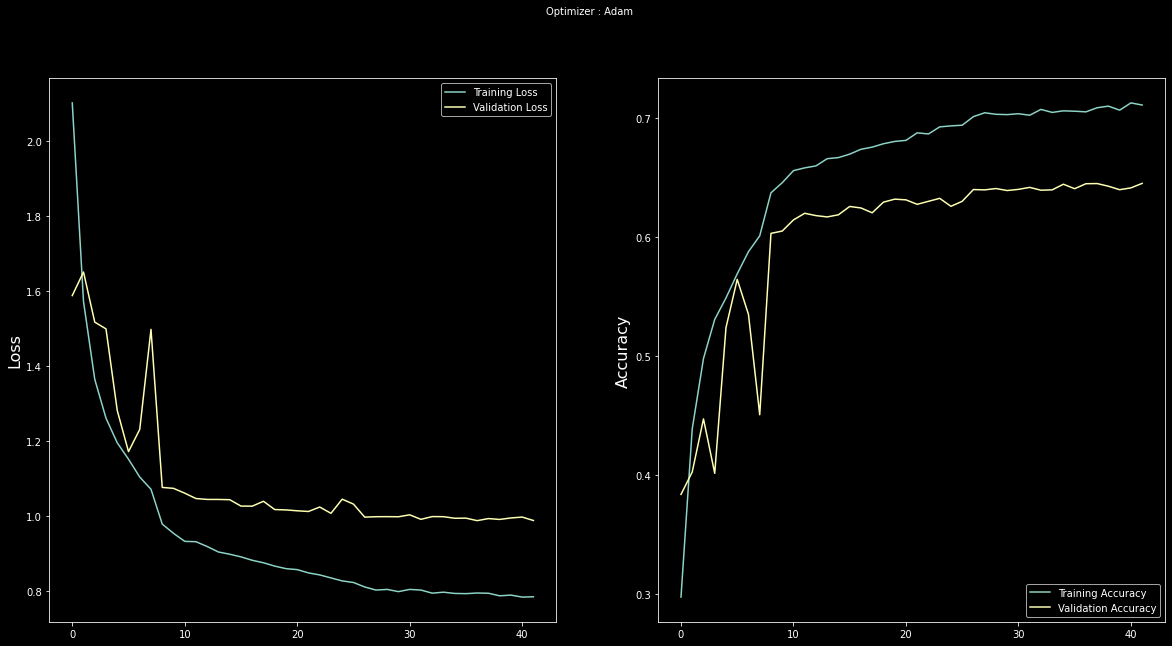

In [14]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
model_json = model.to_json()
with open("basemodel.json", "w") as json_file:
    json_file.write(model_json)